# TP3: FORCE DE CORIOLIS

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

from scripts.tp3_coriolis import TP3Coriolis

In [5]:
# Create TP oject
tp = TP3Coriolis(name='calpe', HAS_TO_SAVE=False)

## 1. EFFET DE LA FORCE DE CORIOLIS

### 1.1. Vitesse constante dans le tube? Pourquoi?

La vitesse est contante dans le tube, $\partial_x U = 0$ 

Pour le principe de conservation de la masse: 
$$U_A S_A = U_B S_B$$

Dans le tube $S_A = S_B$, donc $U_A = U_B$


### 1.2. Force de Coriolis sur petit volume de fluide

La force de Coriolis est $\mathbf{f_c} = -m \cdot \mathbf{a_c} = m \cdot 2 \mathbf{\Omega} \times \mathbf{v}$. Le vecteur de rotation est $\mathbf{\Omega} = [0,0, \Omega]$. Le vecteur de vitesse du fluide $\mathbf{v} = [v, 0, 0]$. 

La force de Coriolis sur un diferentiel de volume est donc: $$\mathbf{dF_c} = -\rho S dr 2 \Omega U \mathbf{j}$$,
la direction de la force de Coriolis est perpendiculaire à la vitesse de rotation et à la vitesse du fluide. 

### 1.3. Moment force de Coriolis sur petite volume de fluide

Le moment d'une force est $\mathbf{M} = \mathbf{r} \times \mathbf{F}$. Le vecteur de position respecte un point O est $\mathbf{r} = [r, 0, 0]$.

Le moment de la force de Coriolis est: $$\mathbf{dM_c} = -\rho S dr 2 \Omega U r \mathbf{k}$$

### 1.4. Moment total de la force de Coriolis

Le moment total de la force de Coriolis est obtenu en integrant l'expression anterior $$\mathbf{M_c} = 2 \int_0^l dM_c \mathbf{k} = - \rho 2 S \Omega U l^2$$.

Le débit sur un tube du fluide est $Q = U / 2S$, car le débit est reparti parmi les deux tubes.

Le moment total est ecrit comme $$\mathbf{M_c} = - \rho  Q \Omega l^2 \mathbf{k}$$

### 1.5. Effet de ce moment. Mesure

Le moment produira la rotation du moteur par le principe d'action et reaction. 

On va mesurer la force sur le moteur avec le capteur de force. Comme on connait le rayon du disque sur lequel est enroulé la corde de nylon, on peut calculer le couple (moment). 

### 1.6. Vérifier l'expression moment force de Coriolis. Proposer protocole expérimentale

Pour différents valeurs de $\Omega$ et $Q$, on va mésurer le moment de la force de Coriolis avec le capteur de force. On va calculer son valeur aussi avec son expression théorique. On va comparer le deux valeurs. 

### 1.7. Mesures pour differentes valeurs $\Omega$ et Q.
### 1.8. Tracer les valeurs

In [9]:
# Mesure moment force de coriolis pour un débit constant.
charge = 8 # débit in l/min
omegas = [19.5, 45.2, 67.2, 86] # vitesse de rotation rpm/min
forces = [0.15, 0.4, 0.65, 0.95] # force in N

# Calcule moment théorique et moment expérimentale.
moment_theor = []
moment_exp = []

for i, omega in enumerate(omegas):
    moment_theor.append(tp.compute_moment_coriolis(charge, omega))
    moment_exp.append(forces[i] * tp.r_disk)
    
print('Moment théorique = {} in N'.format(moment_theor))
print('Moment expérimentale = {} in N'.format(moment_exp))

Moment théorique = [0.003644333333333333, 0.008447377777777779, 0.012558933333333333, 0.016072444444444445] in N
Moment expérimentale = [0.015299999999999998, 0.0408, 0.0663, 0.09689999999999999] in N


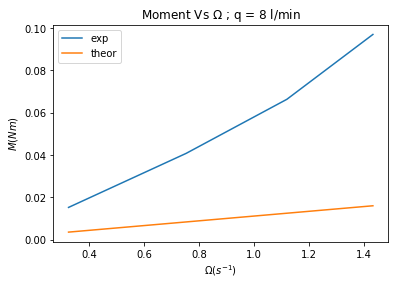

In [17]:
# Tracer les valeurs

fig, ax = plt.subplots()
ax.set_xlabel('$\Omega (s^{-1})$')
ax.set_ylabel('$M (Nm)$')
ax.set_title('Moment Vs $\Omega$ ; q = {} l/min'.format(charge))
omegas_plot = []
for omega in omegas:
    omegas_plot.append(omega / 60.)

ax.plot(omegas_plot, moment_exp, label='exp')
ax.plot(omegas_plot, moment_theor, label='theor')


ax.legend()


In [18]:
# Mesure moment de la force de Coriolis pour une vitesse de rotation constante

omega = 46 # vitesse rotation rpm
charges = [6, 7, 7.5, 9] # débit l/min
forces  = [0.3, 0.35, 0.4, 0.45] # force in Nprint('The coefficient A is {}'.format(A))


# Calcule moment théorique et moment expérimentale.
moment_theor = []
moment_exp = []

for i, charge in enumerate(charges):
    moment_theor.append(tp.compute_moment_coriolis(charge, omega))
    moment_exp.append(forces[i] * tp.r_disk)
    
print('Moment théorique = {} in N'.format(moment_theor))
print('Moment expérimentale = {} in N'.format(moment_exp))

Moment théorique = [0.006447666666666667, 0.007522277777777778, 0.008059583333333334, 0.0096715] in N
Moment expérimentale = [0.030599999999999995, 0.035699999999999996, 0.0408, 0.045899999999999996] in N


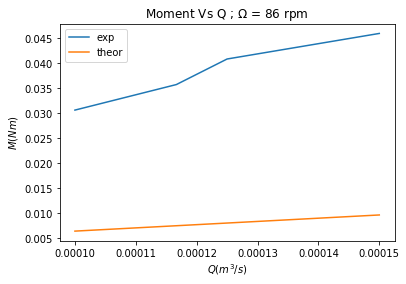

In [20]:
# Tracer les valeurs
fig, ax = plt.subplots()
ax.set_xlabel('$Q (m^3/s)$')
ax.set_ylabel('$M (Nm)$')
ax.set_title('Moment Vs Q ; $\Omega$ = {} rpm '.format(omega))

charges_plot = []
for charge in charges:
    charges_plot.append(tp.convert_charge_to(charge, to_units='m3/s', from_units='l/min'))

ax.plot(charges_plot, moment_exp, label='exp')
ax.plot(charges_plot, moment_theor, label='theor')

ax.legend()


## 2. EFFET DE LA FORCE D'ENTRAINEMENT (FORCE CENTRIFUGE)

### 2.1. Expression force d'entrainement. Déduire que cette force dérive d'un potentiel.

La force d'entrainement sur un un section de tube est
$$dF = \rho dr S r \Omega^2$$

Si on dérive le potentiel on trouve la force d'entrainement par unité de surface
$$dE_e = \rho \Omega^2 r dr$$

### 2.2. Géneraliser la relation de Bernoulli. 

$$h = \frac{Q^2}{4S^2}\frac{1}{g} - \frac{l^2}{g}\Omega^2$$

$$A = \frac{Q^2}{4S^2}\frac{1}{g}$$

$$B = \frac{l^2}{g}$$

### 2.3. Mésurer h pour différentes vitesses de rotation. Calculer valeurs A et B.


In [24]:
# Mesure moment force de coriolis pour un débit constant.
charge = 8 # débit in l/min
omegas = [19.5, 45.2, 67.2, 86] # vitesse de rotation rpm
hs = [0.405, 0.34, 0.24, 0.105] # hateur m

charge = tp.convert_charge_to(charge, to_units='m3/s', from_units='l/min')

# Compute A et B
A = charge**2 / (4 * tp.gravity * tp.surf_tube**2)
B = tp.l_tube**2 / tp.gravity

print('The coefficient A is {}'.format(A))
print('The coefficient B is {}'.format(B))

The coefficient A is 0.03545574859408254
The coefficient B is 0.008581632653061224


### 2.4. Tracer les mesures

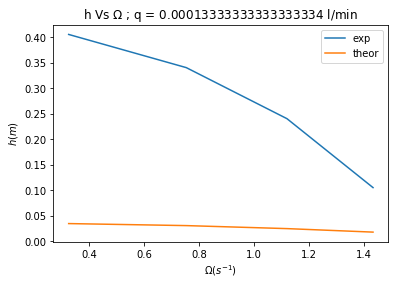

In [26]:
# Tracer h Vs Omega
fig, ax = plt.subplots()
ax.set_xlabel('$\Omega (s^{-1})$')
ax.set_ylabel('$h (m)$')
ax.set_title('h Vs $\Omega$ ; q = {} l/min'.format(charge))

# Passer unités omega à systeme internationale
omegas_plot = []
for omega in omegas:
    omegas_plot.append(omega / 60.)

# Calculer h_theor
h_theor = []
for omega in omegas_plot:
    h_theor.append(A - (B * omega**2))
                   
ax.plot(omegas_plot, hs, label='exp')
ax.plot(omegas_plot, h_theor, label='theor')
ax.legend()